In [11]:
import pandas as pd
import numpy as np
import plotly.express as px

In [12]:
df = pd.read_csv('train.csv')

In [13]:
df.head()

,Id,Title,Body,Tags,CreationDate,Y
0,34552656,Java: Repeat Task Every Random Seconds,<p>I'm already familiar with repeating tasks e...,<java><repeat>,2016-01-01 00:21:59,LQ_CLOSE
1,34553034,Why are Java Optionals immutable?,<p>I'd like to understand why Java 8 Optionals...,<java><optional>,2016-01-01 02:03:20,HQ
2,34553174,Text Overlay Image with Darkened Opacity React...,<p>I am attempting to overlay a title over an ...,<javascript><image><overlay><react-native><opa...,2016-01-01 02:48:24,HQ
3,34553318,Why ternary operator in swift is so picky?,"<p>The question is very simple, but I just cou...",<swift><operators><whitespace><ternary-operato...,2016-01-01 03:30:17,HQ
4,34553755,hide/show fab with scale animation,<p>I'm using custom floatingactionmenu. I need...,<android><material-design><floating-action-but...,2016-01-01 05:21:48,HQ


In [14]:
print("total rows in train data: ", len(df))

total rows in train data:  45000


In [15]:
valid = pd.read_csv('valid.csv')
df = pd.concat([df, valid])[-40000:].reset_index(drop=True)
df = df.dropna().reset_index(drop=True)

In [16]:
df.head()

,Id,Title,Body,Tags,CreationDate,Y
0,43676968,How to do match exactly the content using PHP,I need one help.I need to match two string usi...,<php>,2017-04-28 09:38:23,LQ_EDIT
1,43676976,How to create organizational contact using MS ...,<p>Office 365 administration center allows to ...,<microsoft-graph-api>,2017-04-28 09:38:39,HQ
2,43677293,Debug both javascript and c# in ASP.NET Core M...,<p>Is there a way to set breakpoints and debug...,<javascript><c#><debugging><visual-studio-code>,2017-04-28 09:53:55,HQ
3,43677527,TypeScript type ignore case,<p>I have this type definition in TypeScript:<...,<typescript><types><case-insensitive><typescri...,2017-04-28 10:04:39,HQ
4,43679287,"Trying to pass value through Forms, but not wo...",Dim form As New Mainuser(TextBox1.Text)\r\...,<vb.net><winforms>,2017-04-28 11:36:56,LQ_EDIT


In [17]:
# title_freq = train_df.title.str.split(expand=True).stack().value_counts()
# body_freq = train_df.body.str.split(expand=True).stack().value_counts()

In [18]:
# custom stop_words has been selected by frequencies of words which has less use
stop_words = ['to','in','a','How','the','of','and','with','is','I','from','for','not','on','using','how','an','-','can','i','do','file','array','get','when','string', 'this', 'my', 'it', 'use', 'What', 'value', 'code',
 'function','or', 'error', 'data', 'Why', 'does', 'if', 'by', 'that', 'between', 'into','Is','one','make','all','text','create', 'very', 'every', 'simple',
 'be','two','but','find','working','have','after','add','another','way','without','are','help','there','Can','am','change','me','only','want','what','work','why','you','at','need','any','has','Using','out',"doesn't",'no','first','based','write','trying',
 'we','than','The','Cannot','more','before', 'let', 'void', 'hello', 'world', 'hard', '>', '<', ':','know', 'Getting','&','then','last','Unable','Change','=', 'please', 'is', 'in', 'and', 'of', 'that', 'this', 'have', 'with', 'from', '//', 
 'how', 'would', 'which', 'my', 'at', 'like', 'some', 'file', 'some', 'will', '==', 'trying', 'way', '*', 'just', 'then', "following", 'follow', 'into', 'was', 'something', 'about', 'could', 'should', 'might', 'would', 'see', 'text',
 'values', 'convert', 'type', 'multiple', 'variable', 'loop', 'while', 'name', 'difference', 'same', 'image', 'time', 'input', 'check',
 'return', 'files', 'remove', 'line', 'specific', 'run', 'different', 'print', 'numbers', 'element', 'read', 'replace', 'other', 'expression','open', 'running','fix',
 'store', 'best', 'pass', 'click', 'through', 'issue', 'id', 'test', '/', 'found', 'save', 'size','index', 'field', 'its', 'delete', 'current',
 'characters', 'creating', 'failed', 'code?', 'random', 'nested', 'instead', 'used', 'character', 'activity', 'operator', 'result', 'new', 'return',
 'int', 'so', 'public', 'class', 'import', 'var', 'else', 'tried', 'where', ',', 'line', 'user', 'number', 'list', 'same', 'run', 'here', 'set', '=&gt;',
 'name',  'problem', 'type', 'other', 'each', 'static', 'try', 'also', 'while', 'case', 'values','up', 'print', 'these', 'now', 'used', 'they', 'input', 'example',
 'end', '&lt;&lt;', 'found', 'call','project', 'because','below', 'anyone', 'been', 'able', 'program', 'them', 'question', 'id', 'echo', 'x', 'works', '!=',
 'did', 'variable', 'image', 'error:', 'thanks', 'page', 'running', 'button','files', 'test', 'doing', 'view', 'read', 'column', 'show', 'check', 'understand',
 'possible', 'date', '&lt;div', 'build', 'seems', 'const', 'someone', 'got', 'def', 'even', 'still', 'created', 'both', 'char', 'already', 'double', '&lt;',
 'null', 'such', 'start', 'display', 'main', 'extends', 'really', 'message',]

In [19]:
stop_words = list(set(map(lambda x:x.lower(), stop_words)))

In [21]:
print("total rows in train data: ", len(valid))

total rows in train data:  15000


In [22]:
import re
def tags_pp(tags):
    """ extracts and returns tags from Tag column"""
    tags = re.findall(r'\<.*?\>', tags) 
    tags = [tag.strip('<>') for tag in tags]
    return tags

In [23]:
df["tags_list"] = df.Tags.apply(lambda x: tags_pp(x))

In [25]:
from sklearn.preprocessing import MultiLabelBinarizer

# transforming label tags in one hot encoding formt
tags = df["tags_list"]
mlb = MultiLabelBinarizer()

onehot_tags = pd.DataFrame(mlb.fit_transform(tags),
                   columns=mlb.classes_,
                   index=tags.index)

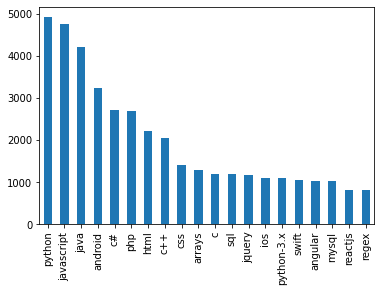

In [26]:
onehot_tags.sum(axis=0).sort_values(ascending=False)[:20].plot.bar()

In [27]:
# select top tags having atleast 20 samples
cols = [col for col in onehot_tags.columns if (onehot_tags[col].sum(axis=0)>20)]
top_tags = onehot_tags[cols]

In [29]:
top_tags.shape

(40000, 551)

In [31]:
y = top_tags
del tags, onehot_tags, top_tags

In [32]:
y.head()

,.htaccess,.net,.net-core,airflow,ajax,algorithm,amazon-cloudformation,amazon-dynamodb,amazon-ec2,amazon-s3,amazon-web-services,anaconda,android,android-8.0-oreo,android-activity,android-architecture-components,android-constraintlayout,android-edittext,android-emulator,android-fragments,android-gradle-plugin,android-intent,android-layout,android-recyclerview,android-room,android-sqlite,android-studio,androidx,angular,angular-cli,angular-material,angular-material2,angular2-routing,angular5,angular6,angularjs,animation,ansible,apache,apache-kafka,...,vim,visual-c++,visual-studio,visual-studio-2015,visual-studio-2017,visual-studio-2019,visual-studio-code,vue-component,vue-router,vue.js,vuejs2,vuetify.js,vuex,web,web-scraping,web-services,webdriver,webpack,websocket,webview,while-loop,winapi,windows,windows-10,windows-subsystem-for-linux,winforms,woocommerce,wordpress,wpf,x86,xamarin,xamarin.forms,xaml,xampp,xcode,xcode11,xcode8,xcode9,xml,xpath
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [33]:
import string
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links, remove punctuation
    and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[/?{}|,()`<>[]"]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('\n', '', text)

    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "can not ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'\n", " ", text)
    text = re.sub(r"\'\xa0", " ", text)
    text = re.sub('\s+', ' ', text)
    # text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = text.split(' ')

    return text

In [34]:
def text_preprocessing(text):
    """
    Cleaning and parsing the text.

    """
    nopunc = clean_text(text)
    remove_stopwords = [w for w in nopunc if w not in stop_words]
    combined_text = ' '.join(remove_stopwords)
    return combined_text

In [35]:
# Applying the cleaning function to both to data
train_df = pd.DataFrame()
train_df['title'] = df['Title'].apply(str).apply(lambda x: text_preprocessing(x))
train_df['body'] = df['Body'].apply(str).apply(lambda x: text_preprocessing(x))

In [36]:
# average lengths of title and body columns
lengths_title = [len(train_df.iloc[i]['title'].split()) for i in range(len(train_df))]
lengths_body = [len(train_df.iloc[i]['body'].split()) for i in range(len(train_df))]

print("avg. title len: ", sum(lengths_title)/len(train_df), "max len: ", max(lengths_title))
print("avg. body len: ", sum(lengths_body)/len(train_df), "max len: ", max(lengths_body))

avg. title len:  4.3767 max len:  21
avg. body len:  53.930175 max len:  2642


In [38]:
train_df.head()

,title,body
0,match exactly content php,help.i match php.i explaining scenario below. ...
1,organizational contact ms graph office 365 res...,office 365 administration center allows organi...
2,debug javascript c# asp.net core mvc vs,breakpoints debug javascript c# vs (on macos)?...
3,typescript ignore,"definition typescript:export xhrtypes ""get"" | ..."
4,"forms, correctly","dim form as mainuser(textbox1.text) reason, t..."


In [39]:
v = pd.Series(lengths_title).value_counts()

fig = px.bar(x=v.index, y=v.values, title='title lengths')
fig.show()

In [40]:
v = pd.Series(lengths_body).value_counts()

fig = px.bar(x=v.index, y=v.values, title='body lengths')
fig.show()

In [41]:
del lengths_body, lengths_title

In [42]:
from iterstrat.ml_stratifiers import MultilabelStratifiedKFold
# splitting indices for train and valid dataset
msss = MultilabelStratifiedShuffleSplit(n_splits=2, test_size=0.10, random_state=123)
trn_idx, test_idx = next(msss.split(train_df, y))

In [43]:
from sklearn import metrics

import torch
from torch import optim
from torch import nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader
from transformers import BertModel,  BertConfig, BertTokenizerFast, AdamW, BertTokenizer, DistilBertTokenizer, DistilBertModel, DistilBertConfig

In [44]:
threshold_value = 0.2 
evaluation = True
epochs = 15
title_max_length = 10
body_max_length = 100
batch_size = 64

In [45]:
# Name of the BERT model to use
model_name = 'bert-base-uncased'
# Max length of tokens
max_length = 34
# Load transformers config and set output_hidden_states to False
config = BertConfig.from_pretrained(model_name)
config.output_hidden_states = False
# Load BERT tokenizer
tokenizer = BertTokenizer.from_pretrained(pretrained_model_name_or_path = model_name, config = config)

In [46]:
def encode(texts, text_type='title'):
    """ returns ids and attention masks for texts"""
    if text_type == 'title':
        max_length = title_max_length
    else:
        max_length = body_max_length
    
    ids = []
    att_masks = []
    for text in texts:
        text_ids = tokenizer.encode_plus(text, max_length=max_length, padding="max_length", truncation=True)
        ids.append(text_ids.input_ids)
        att_masks.append(text_ids.attention_mask) 
    
    ids = torch.tensor(ids)
    att_masks = torch.tensor(att_masks)

    return ids, att_masks


In [47]:
# generating embeddings for train data
titles = train_df.loc[trn_idx].title
train_title_ids, train_title_att_masks = encode(titles)
train_body_ids, train_body_att_masks = encode(train_df.loc[trn_idx].body.values, text_type="body")

In [48]:
# generating embeddings for valid data
val_title_ids, val_title_att_masks = encode(train_df.loc[test_idx].title)
val_body_ids, val_body_att_masks = encode(train_df.loc[test_idx].body, text_type="body")

In [49]:
def init_weights(m):
    """creating weights"""
    if type(m) == nn.Linear:
        torch.nn.init.xavier_uniform_(m.weight)
        m.bias.data.fill_(0.01)

class BertClassifier(nn.Module):
    def __init__(self, freeze_bert=False):
        super(BertClassifier,self).__init__()
        # Specify hidden size of Bert, hidden size of our classifier, and number of labels
        D_in, H, H2, H3, D_out = 768, 1024, 512, 256, y.shape[1]
        
        self.bert = BertModel.from_pretrained("bert-base-uncased")        
        self.out = nn.Sequential(nn.Dropout(0.1), nn.ReLU(), nn.Linear(D_in, H), nn.Dropout(0.3), nn.ReLU(), nn.Linear(H, D_out)) #nn.Linear(H2, H3),  nn.Dropout(0.3), nn.ReLU(), nn.Linear(H, H2),  nn.Dropout(0.3), nn.ReLU(),   
        self.out.apply(init_weights)

    def forward(self,input_ids, attention_mask=None):
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        
        # Extract the last hidden state of the token `[CLS]` for classification task
        last_hidden_state_cls = outputs[0][:,0,:]
        
        out = self.out(last_hidden_state_cls)
        
        return out

In [50]:
# creating train and vaid dataloaders
train_data = TensorDataset(torch.cat((train_title_ids, train_body_ids), dim=1), torch.cat((train_title_att_masks, train_body_att_masks), dim=1),  torch.tensor(y.loc[trn_idx].values))
train_dataloader = DataLoader(train_data, batch_size=batch_size)

val_data = TensorDataset(torch.cat((val_title_ids, val_body_ids), dim=1), torch.cat((val_title_att_masks, val_body_att_masks), dim=1),  torch.tensor(y.loc[test_idx].values))
val_dataloader = DataLoader(val_data, batch_size=batch_size)

In [51]:
# setting device available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# initilizing model
bert_classifier = BertClassifier(freeze_bert=False).to(device)
# loss functions for labels
loss_fn = nn.BCEWithLogitsLoss()
# loss_fn = nn.MultiLabelMarginLoss()

optimizer = optim.Adam(bert_classifier.parameters(),
                     lr=1e-4, #Default learning rate
                     )
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer,  'min', patience=2, eps=1e-3)

In [52]:
train_y = y.loc[trn_idx]
val_y = y.loc[test_idx]

In [54]:
def evaluate(model, val_dataloader, val_y):
        total_loss = 0
        bert_classifier.eval()
        preds = []

        for step, batch in enumerate(val_dataloader):
            b_input_ids, att_mask, labels = tuple(t.to(device).long() for t in batch)
            logits = bert_classifier(b_input_ids, att_mask)
            loss = loss_fn(logits.float(), labels.float())
            total_loss += loss.item()
            preds.append(logits.sigmoid().detach().cpu().numpy())
            
        val_preds = np.concatenate(preds)
        val_loss = total_loss / len(val_dataloader)
        val_auc = metrics.roc_auc_score(torch.tensor(val_y.values), np.array(val_preds>threshold_value,dtype=np.int32))

        return val_loss, val_auc, val_preds

In [55]:
import gc
gc.collect()

422

In [56]:
import time
best_auc = 0
for epoch_i in range(epochs):
        # Measure the elapsed time of each epoch
        t0_epoch = time.time()

        # Reset tracking variables at the beginning of each epoch
        total_loss = 0
        # Put the model into the training mode
        bert_classifier.train()
        # to store all batches predictions
        preds = []

        # For each batch of training data...
        for step, batch in enumerate(train_dataloader):
            # Load batch to GPU
            b_input_ids, att_mask, labels = tuple(t.to(device).long() for t in batch)

            # Zero out any previously calculated gradients
            bert_classifier.zero_grad()

            # Perform a forward pass. This will return logits.
            logits = bert_classifier(b_input_ids, att_mask)

            # Compute loss and accumulate the loss values
            loss = loss_fn(logits.float(), labels.float())

            total_loss += loss.item()

            # Perform a backward pass to calculate gradients
            loss.backward()

            # Clip the norm of the gradients to 1.0 to prevent "exploding gradients"
            torch.nn.utils.clip_grad_norm_(bert_classifier.parameters(), 1.0)

            # Update parameters and the learning rate
            optimizer.step()
            scheduler.step(loss)

            preds.append(logits.sigmoid().detach().cpu().numpy())
            
        train_preds = np.concatenate(preds)

        # avergage loss over entire training data
        avg_train_loss = total_loss / len(train_dataloader)
        train_auc = metrics.roc_auc_score(torch.tensor(train_y.values), np.array(train_preds>threshold_value,dtype=np.int32))

        time_elapsed = time.time() - t0_epoch
        print("epoch: {} | loss: {} | train auc: {} | time elapsed: {}".format(epoch_i,  avg_train_loss, train_auc, time_elapsed))
        print("-"*90)
        if evaluation == True:
            # After the completion of each training epoch, measure the model's performance
            # on our validation set.
            val_loss, val_auc, val_preds = evaluate(bert_classifier, val_dataloader, val_y)
            
            print("epoch: {} | val loss: {} | val auc: {}".format(epoch_i, val_loss, val_auc))
            print("-"*90)
            if val_auc > best_auc:
                best_auc = val_auc
                # torch.save(bert_classifier, 'bert_classifier.model')
                torch.save(bert_classifier.state_dict(), 'bert_classifier.model')
        print("\n")
    
print("Training complete!")

epoch: 0 | loss: 0.04580105869281462 | train auc: 0.5016971833950586 | time elapsed: 344.97575187683105
------------------------------------------------------------------------------------------
epoch: 0 | val loss: 0.017182449204108073 | val auc: 0.5070886688053737
------------------------------------------------------------------------------------------


epoch: 1 | loss: 0.015040398003007443 | train auc: 0.5212316279438185 | time elapsed: 344.6755712032318
------------------------------------------------------------------------------------------
epoch: 1 | val loss: 0.012289662490643206 | val auc: 0.5366873259643434
------------------------------------------------------------------------------------------


epoch: 2 | loss: 0.011695350210974738 | train auc: 0.5533377657009948 | time elapsed: 344.747052192688
------------------------------------------------------------------------------------------
epoch: 2 | val loss: 0.010800630903788029 | val auc: 0.5704817989194535
--------------